In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

In [23]:
#generate and filter the data
data = pd.read_csv('new_data.csv')
data['Sex'] = data['Sex'].replace('M',1)
data['Sex'] = data['Sex'].replace('F',0)
data['Side'] = data['Side'].replace('L',0)
data['Side'] = data['Side'].replace('R',1)
X = data[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort','LOS']]
X = X.dropna(axis=0)

In [24]:
X2 = X[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort','LOS']]
X2=X2.rename(columns= {"GX VO2 Max VO2 (mL/kg/min)":'G2',"GX AT VO2 (mL/kg/min)" : "G0", "GX AT VE/VCO2" : "G1",
                        'GX VO2 Max VO2/Pred (%)' : 'G3','GX VO2 Max VO2/HR (mL/beat)':'G4','GX Predicted VO2/HR (mL/beat)':'G5','GX Work Max Work (Watts)':'G6','GX Predicted Work (Watts)':'G7','PF Pre FEV1/FVC (%)':'G8','PF Pre FEV1 (L)':'G9', 'pred mort' : 'predmort'})
X2 = X2.drop(X2[(X2['G8'] == 0.0)|(X2['G9'] == 0.0)].index)
X2.shape

(186, 16)

In [25]:
X_value = X2[['Age','Sex','BMI','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','Side','predmort']]
x_sc = X_value
y_value = X2[['LOS']]

In [26]:
def plot_graph(MAE,MSE,Median,sd,r2):
    x_data = ('MAE','MSE','Median AE','s.d','R2 score')
    y_data = [MAE,MSE,Median,sd,r2]
    color = 'coral'
    bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
    plt.bar_label(bar, label_type='edge')
    plt.show()
    plt.close()

In [2]:
def regression_model(model,X,y,n):
    lg = model(alpha = n)
    y = np.array(y)
    X1 = np.array(X)
    mean_ab_error = []
    mean_sq_error = []
    median_error = []
    rmse = []
    pred = []
    y_true = []
    loo = LeaveOneOut()
    
    for train_index, test_index in loo.split(X1):
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_test = np.array(y_test)
        y_train = np.array(y_train)

        lg.fit(X_train,y_train)

        predict_data = lg.predict(X_test)
        pred.append(predict_data)
        y_true.append(y_test)

        mean_ab_error.append(mean_absolute_error(y_test,predict_data))
        mean_sq_error.append(mean_squared_error(y_test,predict_data))
        median_error.append(median_absolute_error(y_test,predict_data))
        rmse.append(mean_squared_error(y_test,predict_data,squared = False))

    MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
    MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
    Median = np.median(np.array(median_error))
    SD = np.std(pred)
    RMSE = np.sum(np.array(rmse)) / len(mean_ab_error)
    y_new = np.array(y_true).reshape(-1)
    pred_new = np.array(pred).reshape(-1)
    r2 = r2_score(y_new,pred_new)
    return y_new,pred_new

In [ ]:
model = Ridge
true1, pred1 = regression_model(model,x_sc,y_value,0.9899999999999995)

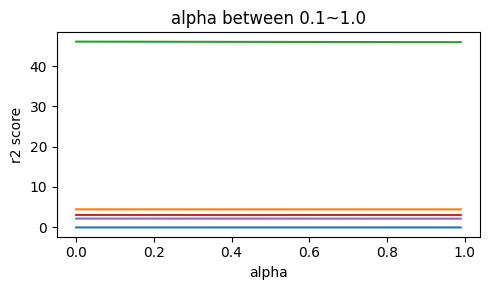

In [21]:
alphas = np.arange(0, 1.0, 0.01)
loo = LeaveOneOut()
plt.figure(figsize=(5, 3))
# sc = StandardScaler()
# x_sc = sc.fit_transform(X_value)
for model in [Ridge]:
    scores = [regression_model(model,x_sc,y_value,alpha) for alpha in alphas]
    plt.plot(alphas,scores)
plt.title("alpha between 0.1~1.0")
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.tight_layout()
plt.show()

In [10]:
reg = linear_model.RidgeCV(alphas=np.arange(0.1,1.0,0.01), scoring='r2')
reg.fit(X_value,y_value)
print(reg.alpha_)

0.9899999999999995


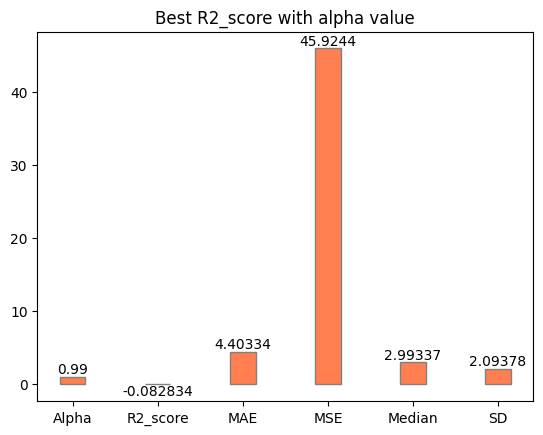

In [11]:
model = Ridge
r2_ridge,MAE,MSE,Median,SD = regression_model(model,x_sc,y_value,0.9899999999999995)
alpha_ridge = reg.alpha_
x_data = ('Alpha','R2_score','MAE','MSE','Median','SD')
y_data = [alpha_ridge,r2_ridge,MAE,MSE,Median,SD]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge')
plt.title("Best R2_score with alpha value")
plt.show()
plt.close()

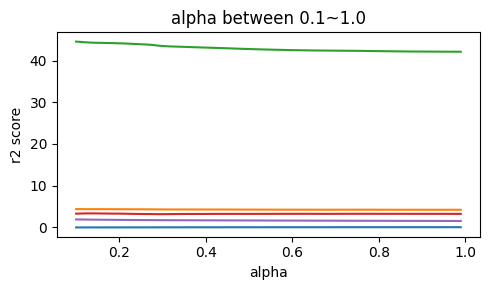

In [28]:
xd

In [13]:
reg = linear_model.LassoCV(alphas=np.arange(0.1,1.0,0.01),cv=loo)
reg.fit(x_sc,y_value)
alpha_lasso = (reg.alpha_)

/Users/beckhol/m3/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


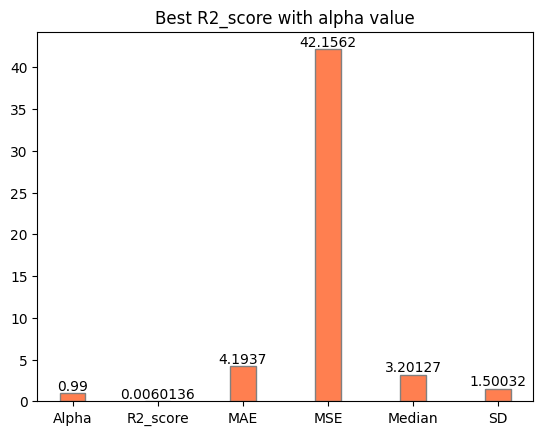

In [14]:
model = Lasso
r2_lasso,MAE,MSE,Median,SD = regression_model(model,x_sc,y_value,alpha_lasso)
x_data = ('Alpha','R2_score','MAE','MSE','Median','SD')
y_data = [alpha_lasso,r2_lasso,MAE,MSE,Median,SD]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge')
plt.title("Best R2_score with alpha value")
plt.show()
plt.close()

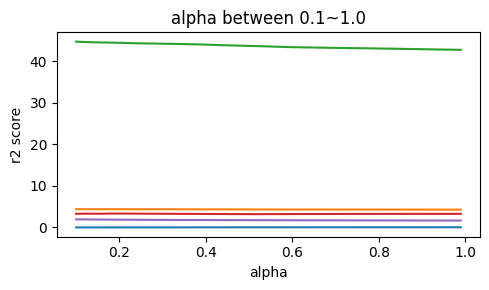

In [15]:
alphas = np.arange(0.1, 1, 0.01)
loo = LeaveOneOut()
plt.figure(figsize=(5, 3))
for model in [ElasticNet]:
    scores = [regression_model(model,x_sc,y_value,alpha) for alpha in alphas]
    plt.plot(alphas,scores)
plt.title("alpha between 0.1~1.0")
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.tight_layout()
plt.show()

In [30]:
reg = linear_model.ElasticNetCV(alphas=np.arange(0.1,1.0,0.01),cv=loo)
reg.fit(x_sc,y_value)
alpha_els = (reg.alpha_)

/Users/beckhol/m3/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


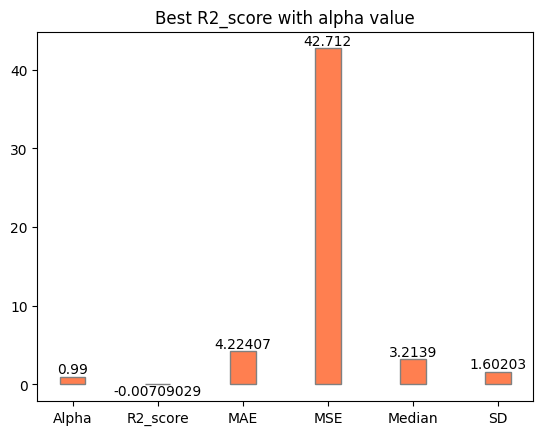

In [31]:
model = ElasticNet
r2_els,MAE,MSE,Median,SD = regression_model(model,x_sc,y_value,alpha_els)
x_data = ('Alpha','R2_score','MAE','MSE','Median','SD')
y_data = [alpha_els,r2_els,MAE,MSE,Median,SD]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge')
plt.title("Best R2_score with alpha value")
plt.show()